In [3]:
import re
import io
import json
import requests
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
from urllib.parse import quote
from multiprocessing import Pool
from IPython.display import display

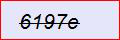

'ASP.NET_SessionId=cpwxp10p0crxuzvtnti25nko'

In [2]:
s = requests.Session()
url = "https://www.gturesults.in/Handler.ashx"
# url = "https://www.gturesults.in/Default.aspx"
r = s.get(url)
display(Image.open(io.BytesIO(r.content)))
re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()

In [4]:
c = "6197e"

In [5]:
exam = quote("3700$S2023$2023-06-17$current$0")

In [6]:
url = "https://www.gturesults.in/Default.aspx"

headers = {
    "Host": "www.gturesults.in",
    "Content-Length": "1288",
    "Cache-Control": "max-age=0",
    "Sec-Ch-Ua": "\"Not A(Brand\";v=\"24\", \"Chromium\";v=\"110\"",
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": "\"Windows\"",
    "Upgrade-Insecure-Requests": "1",
    "Origin": "https://www.gturesults.in",
    "Content-Type": "application/x-www-form-urlencoded",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.gturesults.in/Default.aspx?ext=S2023",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Cookie": re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()
}

querystring = {"ext":"S2023"}

kitoptions = {
  "enable-local-file-access": None ,
}

In [7]:
def f1(soup):
    soup2 = BeautifulSoup(str(soup.findAll(class_="Search")[0]), 'html.parser')
    tr = soup2.findAll('tr')[2]
    data = {}
    for td in tr.find_all('td'):
        if td.has_attr('class') and td['class'][0] == 'tdodd':
            key = td.text.strip()
        else:
            value = td.find('span').text.strip()
            data[key] = value
    soup = BeautifulSoup(str(soup.findAll(class_="Search")[1]), 'html.parser')
    table = soup.find('table')
    header_map = {'Name': 'lblName', 'Enrollment No.': 'lblEnrollmentNo', 'Exam Seat No.': 'lblExam', 'Declared On': 'lblDeclaredOn', 'Exam': 'lblExamName', 'Branch': 'lblBranchName'}
    result = {}
    for header, id_attr in header_map.items():
        span = table.find('span', {'id': id_attr})
        result[header] = span.text.strip()
    data.update(result)
    return data

def f2(soup):
    table = soup.findAll(class_='Rgrid')[2]
    rows = table.find_all('tr')
    data = {}
    for row in rows:
        cells = row.find_all('td')
        for cell in cells:
            key = cell.text.strip().split(':')[0]
            value = cell.find('span', {'class': 'csstotal'}).text.strip()
            data[key] = value
    return data

def vtodur(enr):
    payload = f"__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=%2FwEPDwUKLTQ2MTAzMzcxNQ9kFgICAw9kFgwCAQ8WAh4EVGV4dAWTASA8YSBzdHlsZT0iY29sb3I6IGdyYXk7IGZvbnQtc2l6ZTogMTBweDsiIGhyZWY9IkRlZmF1bHQuYXNweD9leHQ9Q3VycmVudCI%2BQXJjaGl2ZTwvYT4gIHwgQ3VycmVudCA8c3BhbiBzdHlsZT0iY29sb3I6IG1hcm9vbjsiPiBbU3VtbWVyIDIwMjNdPC9zcGFuPmQCAw8PFgIeB1Zpc2libGVoZGQCBQ8WAh8BaGQCBw8PFgIfAAULU3VtbWVyIDIwMjNkZAIJDxBkZBYAZAILDxAPFgYeDkRhdGFHcm91cEZpZWxkBQZCUkFOQ0geDURhdGFUZXh0RmllbGQFBUVYQU1OHg5EYXRhVmFsdWVGaWVsZAUGRVhBTUlEZDKOAwABAAAA%2F%2F%2F%2F%2FwEAAAAAAAAADAIAAABBT3B0aW9uQ3RybCwgVmVyc2lvbj0xLjAuMC4wLCBDdWx0dXJlPW5ldXRyYWwsIFB1YmxpY0tleVRva2VuPW51bGwFAQAAAB5WaWtTZXJ2ZXJDb250cm9sLk9wdGlvblRyaXBsZXQEAAAABUZpcnN0BlNlY29uZAVUaGlyZAZGb3VydGgCAgICAgAAAAgIAgAAAAkDAAAACQQAAAAJBQAAABEDAAAAAgAAAAYGAAAAKi4uLi4uQkUgU0VNIDggLSBSZWd1bGFyIChNQVkgMjAyMykgcGhhc2UgSQYHAAAAKy4uLi4uQkUgU0VNIDggLSBSZWd1bGFyIChNQVkgMjAyMykgcGhhc2UgSUkRBAAAAAIAAAAGCAAAAB8zNzAwJFMyMDIzJDIwMjMtMDYtMTckY3VycmVudCQwBgkAAAAfMzcwMSRTMjAyMyQyMDIzLTA2LTE3JGN1cnJlbnQkMBEFAAAAAgAAAAYKAAAAAkJFBgsAAAACQkULZGQYAQUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgEFBmltZ3JlZn1X4UxNJryqAa0VagzmtpRJC3Bc32emV1Z%2BlPrqflng&__VIEWSTATEGENERATOR=CA0B0334&ddlbatch={exam}&txtenroll={enr}&txtSheetNo=&CodeNumberTextBox={c}&btnSearch=Search"
    res = requests.request("POST", url, data=payload, headers=headers).text
    soup = BeautifulSoup(res, 'html.parser')
    d1 = f1(soup)
    if d1['Exam'] == '------------' :
        return vtodur(enr)
    if d1['Name'] == '------------':
        d3 = {'Enrollment No.': enr}
        d3['Message'] = soup.find(id='lblmsg').text
        return d3
    d2 = f2(soup)
    d1.update(d2)
    d1['Message'] = soup.find(id='lblmsg').text
    return d1

# dd = vtodur(190280111043)

with Pool(5) as pp:
  dd = pp.map(vtodur,range(190280111001,190280111160))

df = pd.DataFrame(dd)
df = df.apply(pd.to_numeric, errors= 'ignore' )
df.to_excel("op.xlsx")

In [8]:
df

,Session,Name,Enrollment No.,Exam Seat No.,Declared On,Exam,Branch,Current Sem. Backlog,Total Backlog,SPI,CPI,CGPA,Message
0,Summer 2023,AGRAWAL YASHVI PRADEEP AGRAWAL,190280111001,1.902801e+11,17 Jun 2023,BE SEM 8 - Regular (MAY 2023) phase I,ELECTRONICS & COMMUNICATION ENGINEERING,0.0,0.0,10.0,7.87,7.96,Congratulation!! You have passed this exam.
1,Summer 2023,AMBALIYA SAMIR SHAMBHUBHAI,190280111002,1.902801e+11,17 Jun 2023,BE SEM 8 - Regular (MAY 2023) phase I,ELECTRONICS & COMMUNICATION ENGINEERING,0.0,0.0,10.0,7.80,8.12,Congratulation!! You have passed this exam.
2,NaN,NaN,190280111003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.
3,Summer 2023,ANGHAN POOJABEN SHIVJIBHAI,190280111004,1.902801e+11,17 Jun 2023,BE SEM 8 - Regular (MAY 2023) phase I,ELECTRONICS & COMMUNICATION ENGINEERING,0.0,0.0,9.0,7.41,7.49,Congratulation!! You have passed this exam.
4,NaN,NaN,190280111005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,NaN,NaN,190280111155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.
155,NaN,NaN,190280111156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.
156,NaN,NaN,190280111157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.
157,NaN,NaN,190280111158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oppssss! Data not available.


👈 download <font color='yellow'>op.xlsx</font> from left side bar by double clicking it